# Handwritten number classification : Fully connected Neural Network

Classification of digits written by hand is one of the most popular beginner´s approch to learn machine learning. In this tutorial we will use fully connected **Neural Network** in order to classify the image of handwritten numbers. 

Methodology:
- Data Processing
- Model Architecture: network design
- Training : network
- Evaluating the result

 For science behinid the convolution neural network, please check this videos:
        https://www.youtube.com/watch?v=2-mzxsSWVCU&list=PL2zRqk16wsdo3VJmrusPU6xXHk37RuKzi

###  1) Importing the necessary library

In [3]:
# Importing the necessary library
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

#note you might need to install tenserflow in your anaconda environment, if so type following in the anaconda prompt
# pip install tensorflow==2.7 (CPU version)
# pip install tensorflow-gpu==2.7 (GPU version)

 ### 2) load the MINST dataset
 
Lets load the MINST dataset which contain 60,000 training images and 10,000 test images of handwritten digits. The image are greyscale of 28*28 pixels and labelled with the corresponding digit.

In [4]:
# Load MNIST handwritten digit data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Before processing the data, lets have a look at the dataset itself. 

In [5]:
# to see the shape of image 
for i in range(5):
  print(X_train[i].shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


In [6]:
# see how the picture matrix looks like
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### 3) Processing the Data

Changing the labels data (y_train & y_test) into one-hot format by using the ***to_categorical*** function.
The labels which are represented by integers from 0 to 9 will be converted into a vector of 10 values, where the value at the index corresponding to the label is 1, and all other values are 0.

Eg: the label 2 would be represented as $[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$ in one-hot encoded form.


In [7]:
# one-hot format
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)


In [8]:
# checking how the one-hot format looks like
for i in range(5):
  print(y_test[i])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


### 4) Neural Network Architecture

A fully connected neural network consists of one or more hidden layers, where each neuron in a layer is connected to every other neurons from the previous layer.

- Initially start by creating a simple Neural Network model by using the ***sequential*** class. It will create a neural network model where the layers can be added in sequence. This class allows us to create a neural network by stacking layers on top of each other.


- To add  layers to the model, we should use ***model.add()*** 


- Since first layer is the input layer, we have use out dataset as input, hence we have input it in away that network can comprehend. Use ***flatten*** for the first layer. The Flatten layer in Keras is used to convert a multidimensional input tensor into a single-dimensional output tensor. The Flatten layer takes an input tensor of shape (batch_size, height, width, channels) and flattens it into a single-dimensional tensor of shape (batch_size, height * width * channels). Eg: For an input tensor of shape (32, 28, 28, 3), where 32 is the batch size, 28 is the height and width of each image, and 3 is the number of color channels. The Flatten layer will convert this tensor into a single-dimensional tensor of shape (32, 2352), where 2352 is the product of the height, width, and channels.


- Instead of using ***flatten*** as first layer, once can individually process the input data and provide the relevent shape. Eg: (batch_size, height * width * channels) by using **X_train = X_train.reshape((60000, 784))**. In that case you just add the layer and provide the shape. But in this tutorial we prefer to use ***flatten*** instead.


-  Besdie first layer, the number of units (neurons) to be added is assigned after ***Dense*** in each layer. Rember the number of neurons in the last layer should be same as the desired output classification.


- As activation function has to be assigned for each layers, eg: relu, softmax, etc. Choose which activation function is the best option in each of the layers.


- Finally, it is always nice to print the summery, whihc provides details about the number of parameters being solved.


- For more detials on ***Keras*** model building, please check: https://keras.io/guides/sequential_model/

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


Adding **Batch Normalization** layer to the neural network model.

Batch Normalization operates on mini-batches of data during training, and normalizes the input to each layer by subtracting the mean and dividing by the standard deviation. This can help prevent the values of the input from becoming too large or too small, which can lead to issues such as vanishing gradients or exploding gradients. The normalized output is then rescaled and shifted using learnable parameters, which allow the network to adapt the normalization to the specific task at hand.

In [10]:
# model with batch normalization layer
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(BatchNormalization())
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense_2 (Dense)             (None, 5)                 3925      
                                                                 
 dense_3 (Dense)             (None, 10)                60        
                                                                 
Total params: 7,121
Trainable params: 5,553
Non-trainable params: 1,568
_________________________________________________________________


**Compile the model**

- ***optimizer***: This is the optimization algorithm used to update the weights in the neural network during training. In this case, we are using Stochastic Gradient Descent (SGD).


- In the example implementation you provided, the ***categorical_crossentropy*** loss function is used. This is a commonly used loss function for multi-class classification problems, where the goal is to predict the class label of an input example from a set of possible classes. The ***categorical_crossentropy*** loss function measures the difference between the true class distribution and the predicted class distribution. The predicted class distribution is obtained by applying the softmax function to the output of the model's final layer, which produces a probability distribution over the possible classes.


- The ***accuracy*** metric will be used to monitor the model's performance during training and validation. This iswhich is the proportion of correct predictions among the total number of predictions.



In [11]:
# compilation of model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])


### 5) Training

-  Lets train our neural network using the fit function for the provided dataset. 


- The ***epochs*** refers to number of iteration desired.


- ***validation_data***: This is a tuple of input and target data for the validation set. The validation set is used to evaluate the performance of the model during training and to prevent overfitting. If specified, the validation loss and metrics will be computed and displayed during training.

In [12]:
# Train the Neural Network model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3354 - acc: 0.7003 - val_loss: 0.9140 - val_acc: 0.8237
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8298 - acc: 0.8096 - val_loss: 0.6795 - val_acc: 0.8426
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6796 - acc: 0.8235 - val_loss: 0.5939 - val_acc: 0.8465
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6122 - acc: 0.8318 - val_loss: 0.5519 - val_acc: 0.8502
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5702 - acc: 0.8403 - val_loss: 0.5195 - val_acc: 0.8603
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5469 - acc: 0.8437 - val_loss: 0.5102 - val_acc: 0.8583
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5280 - acc: 0.8496 - val_loss: 0.4921 - val_acc: 0.8663
Epoch 8/10
1875/1875 [==============================] - 2s 1ms

### 6) Prediction


Prediction over the test dataset using the trained model. Ways to evaluate the prediction are as follows:

- Evaluating the performance on the test dataset by using ***model.evaluate()*** function.

The verbosity is set to 0 to suppress output, and store the results in the score variable. The test loss is a scalar value representing the error of the model on the test set, and the test accuracy is the proportion of correctly classified examples in the test set.

In [13]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.46844083070755005
Test accuracy: 0.8704000115394592



- ***model.predict*** checks the output of the predict function.

It applies the trained model to the test set inputs and produces corresponding predicted outputs, which are then stored in the predictions variable. Each element in the predictions array represents the model's predicted probability for a particular class for a given input sample.


In [14]:
# Evaluation 
predictions = model.predict(X_test)
print(predictions)


[[1.88269978e-03 7.57552742e-04 7.16626644e-04 ... 9.46979403e-01
  4.81791655e-03 2.80204751e-02]
 [7.74373114e-02 2.12473140e-04 8.47456872e-01 ... 2.06604658e-04
  7.24069588e-03 2.51075071e-05]
 [3.52038041e-05 9.51123118e-01 1.14705078e-02 ... 1.27982786e-02
  5.94684109e-03 1.04665253e-02]
 ...
 [2.18381523e-04 1.84690894e-03 5.61186171e-05 ... 7.46268127e-03
  1.23017691e-02 4.83039737e-01]
 [7.37977971e-04 1.13111571e-04 7.85704528e-04 ... 1.20604076e-04
  1.71003222e-01 4.17893054e-04]
 [4.39281110e-04 7.02878533e-05 4.89577977e-03 ... 4.92144409e-07
  2.24580220e-03 1.38388437e-04]]


Once you have these predicted probabilities, you can use them to make predictions on new, unseen data by selecting the class with the highest probability. For example, you might use the ***argmax()*** function to find the index of the highest predicted probability for each input sample:

In [15]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 9 5 6]


**Plotting**: 
display the first 10 images from the test dataset showing the prediction on top of each image

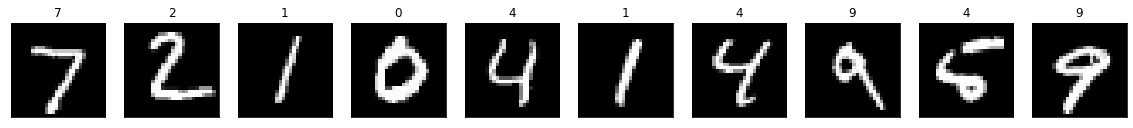

In [16]:
# Display some predictions on test data
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()